<h1> CP Decomposition and Image Compression </h1>

Importing required libraries

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import tensorly as tl
from tensorflow.keras import datasets

## Input Section

In [2]:
n = int(input("Enter the order of the Tensor: "))

print("Enter the shape of the tensor:")
shape = []
for i in range(n):
    shape.append(int(input()))

Enter the order of the Tensor: 2
Enter the shape of the tensor:
28
28


<font size = '3'><b> Image Input </b></font>

Taking image input from MNIST dataset in python.
This is the collection of 28x28 pixel image (black & white)

In [3]:
from keras.datasets import mnist

In [4]:
(img_train, _), (img_test, _) = mnist.load_data()

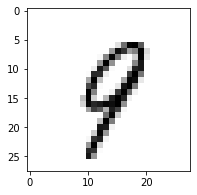

In [5]:
plt.figure(figsize = (3,3))
plt.imshow(img_train[22], cmap = 'binary')
plt.show()

In [6]:
val = img_train[22]
val.shape

(28, 28)

<font size = '2'> Setting up the other paramaters: </font>
- <b>eps</b> - error limit
- <b>k</b> - order of approximation
- <b>iter</b> - Max. no. of iteration

In [7]:
eps = float(input('Enter the value of epsilon: '))

print('\nWe are going to find K-th rank approximation: ')
k = int(input('Enter the value of k: '))

iter = int(input('\nEnter max. number of iteration: '))

Enter the value of epsilon: 0.0001

We are going to find K-th rank approximation: 
Enter the value of k: 8

Enter max. number of iteration: 10000


In [8]:
k, eps, iter

(8, 0.0001, 10000)

<font size = '2'> Setting Initial Factor Matrices </font>

In [9]:
A = []
for i in range(n):
    A.append(np.random.normal(size = (shape[i],k), loc = 0, scale = 1 / k))

Finding the m-modes matrices

In [10]:
val_m = []

for i in range(n):
    val_m.append(tl.unfold(val,i))

# val_m

## ALS: Alternating Least Square

### Matrix Method for Approximation

In [11]:
for a in range(iter):
    # iteration
    
    for k_mode in range(n):
    
        temp = A.copy()
        temp.pop(k_mode)

        B = temp[0]
        for ele in temp[1:]:
            B = linalg.khatri_rao(B, ele)
        
        A[k_mode] = np.matmul(val_m[k_mode], np.matmul(B, linalg.inv(np.matmul(B.T, B))))
                        
        err = tl.norm(val_m[k_mode] - np.matmul(A[k_mode], B.T))
        if err < eps:
            break
    if err < eps:
        break

### Approximated Tensor

In [12]:
result = []
for i in range(n):
    value = []
    for col in range(A[i].shape[1]):
        value.append(A[i][:,col])
    
    result.append(value)
# print(result)

In [13]:
final_val = 0
for j in range(k):
    prod_val = []
    for i in range(n):
        prod_val.append(result[i][j])
    final_val += tl.tenalg.outer(prod_val)
    
# display(final_val, val)

In [14]:
tl.norm(final_val), tl.norm(val), tl.norm(final_val - val)

(1772.0521072339723, 103.82196299434914, 122.71238424735284)

### Relative Error!

In [15]:
tl.norm(final_val - val) / tl.norm(val)

1.1819501453081935

# Image Data Compression

## Example 1

In [16]:
import cv2

In [17]:
cv2.imwrite("img.jpg", final_val)

True

In [18]:
cv2.imwrite('ac_img.jpg', val)

True

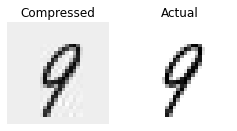

In [19]:
final_val = np.floor(final_val).astype(int)

fig = plt.figure(figsize = (4,4))

fig.add_subplot(1,2,2)
plt.imshow(val, cmap = 'binary')
plt.axis('off')
plt.title('Actual')

fig.add_subplot(1,2,1)
plt.imshow(final_val, cmap = 'binary')
plt.axis('off')
plt.title('Compressed')

plt.show()

### No. of Pixels

In [20]:
print("Actual:      ", end = '')
print('   28 * 28   =', 28 * 28)

print("Compressed:", end = ' ')
print('(28 + 28) * 8 =', (28 + 28) * 8)

Actual:         28 * 28   = 784
Compressed: (28 + 28) * 8 = 448
